In [ ]:
# 감성분석 : 텍스트에 나타난 의견, 평가, 태도와 같은 주관적인 정보를 분석하는 것을 말한다.
# 감성분석론은 크게 어휘 기반의 분석과 기계학습 기반의 분석으로 나뉘어진다.

# 어휘 기반의 분석은 감성이 표현될 수 있는 명사, 형용사,동사를 대상으로 모든 단어에 대해 긍정 혹은 부정의 감성을 붙여서 감성 사전을 구축한
# 후에 이를 기반으로 텍스트에 대한 감성 분석을 수행하는 방식.
# 단어별로 하기엔 문제점이 있기에 문장의 형태소를 분석하고 다시 이를 명사구, 형용사구와 같은 구로 묶는 청킹을 한 후, 밑의 단어로부터
# 상위의 구로 이동하면서 단계적으로 긍/부정을 결정하는 방식도 있다.

# 머신러닝 기반의 감성 분석은 명시적인 감성 사전을 사용하지 않는다. 
# 말뭉치의 영향을 많이 받는다.

In [4]:
# 감성 사전을 이용한 영화 리뷰 감성 분석
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('#review count:', len(movie_reviews.fileids())) # 영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) # id를 10개까지만 출력
# label, 즉 긍정인지 부정인지에 대한 분류
print('#categories of reviews:', movie_reviews.categories())
# label이 부정인 문서들의 id를 반환
print('#num of "neg" reviews:',len(movie_reviews.fileids(categories='neg')))
# label이 긍정인 문서들의 id를 반환
print('#num of "pos" reviews:',len(movie_reviews.fileids(categories='pos')))
fileid = movie_reviews.fileids()[0] # 첫번째 문서의 id를 반환
print('#id of the first review:',fileid)
# 첫번째 문서의 내용을 500자까지만 출력
print('#part of the first review:',movie_reviews.raw(fileid)[:500])
# 첫번째 문서의 감성
print('#sentiment of the first review:', movie_reviews.categories(fileid))

# 영화 리뷰 데이터에서 파일 id를 가져옴
fileids = movie_reviews.fileids()
# 파일 id를 이용해 raw text file을 가져옴
reviews=[movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#part of the first review: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
#sentiment of the first review: ['neg']


In [5]:
# TextBlob을 이용한 감성 분석
# TextBlob은 감성 분석 외에 자연어 처리를 위한 다양한 기능을 제공한다.
from textblob import TextBlob

result = TextBlob(reviews[0])
print(result.sentiment)

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)


In [6]:
def sentiment_TextBlob(docs):
    results= []
    
    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results        

In [7]:
from sklearn.metrics import accuracy_score

print(
    '#TextBlob을 이용한 리뷰 감성분석의 정확도:',
    accuracy_score(categories, sentiment_TextBlob(reviews))
)

#TextBlob을 이용한 리뷰 감성분석의 정확도: 0.6


In [10]:
# AFINN을 이용한 감성 분석
# AFINN은 TextBlob과 같이 매우 직관적이다. 전처리 작업을 알아서 하므로 바로 텍스트를 인수로 넘겨준다.
from afinn import Afinn

def sentiment_Afinn(docs):
    afn = Afinn(emoticons = True)
    results=[]
    
    for doc in docs:
        if afn.score(doc) > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

print(
    '#Afinn을 이용한 리뷰 감성분석의 정확도:',
    accuracy_score(categories, sentiment_Afinn(reviews))
)

#Afinn을 이용한 리뷰 감성분석의 정확도: 0.664


In [11]:
# VADER를 이용한 감성 분석

# VADER는 규칙기반의 감성 분석 알고리즘을 사용하는 것, 트위터나 페이스북 같은 소셜 미디어의 텍스트에서 좋은 성능이 나올 수 있도록 개발

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from afinn import Afinn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(docs):
    analyser = SentimentIntensityAnalyzer()
    results=[]
    
    for doc in docs:
        score = analyser.polarity_scores(doc)
        if score['compound'] > 0 :
            results.append('pos')
        else:
            results.append('neg')
    return results
print(
     '#Vader을 이용한 리뷰 감성분석의 정확도:',
     accuracy_score(categories, sentiment_vader(reviews))
)

#Vader을 이용한 리뷰 감성분석의 정확도: 0.635


In [16]:
# 학습을 통한 머신러닝 기반의 감성 분석
# NLTK 영화 리뷰에 대한 머신러닝 기반 감성 분석
from sklearn.model_selection import train_test_split

X_train, X_test, y_train ,y_test = train_test_split(reviews, categories, test_size=0.2,random_state=7)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))

Train set count: 1600
Test set count: 400


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환

# 실제로 몇 개의 특성이 사용됐는지 확인
print('#Train set dimension:', X_train_tfidf.shape)

X_test_tfidf = tfidf.transform(X_test) # test set을 변환
print('#Test set dimension:',X_test_tfidf.shape)

NB_clf = MultinomialNB(alpha=0.01) # 분류기 선언
NB_clf.fit(X_train_tfidf, y_train) # train set을 이용해 분류기를 학습

# train set에 대한 예측정확도를 확인
print('#Train set score:{:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))

# test set에 대한 예측정확도를 확인
print('#Test set score:{:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

#Train set dimension: (1600, 36189)
#Test set dimension: (400, 36189)
#Train set score:0.998
#Test set score:0.797


In [22]:
# 다음 영화 리뷰에 대한 머신러닝 기반 감성 분석
import pandas as pd
df = pd.read_csv('daum_movie_review.csv')
df.head(5)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


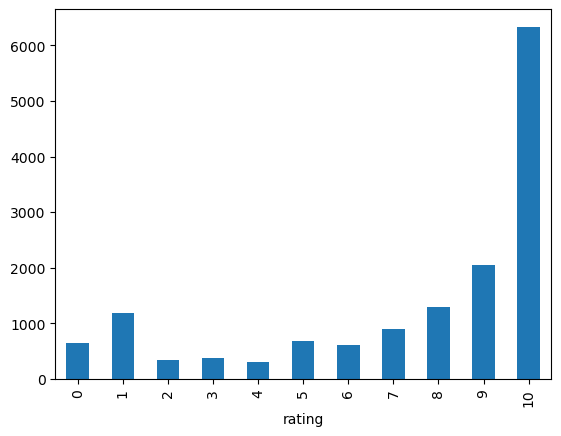

In [23]:
# 5보다 큰값은 긍정, 작은 값은 부정,
# 클래스별로 고르게 분포하지 않는 경우를 불균형 데이터셋이라 한다.
# 이와 같은 불균형 데이터에서의 성능 측정을 위해 사용하는 지표는 정밀도와 재현율이 있다.
# 정밀도 (전체 예측 :긍정에서 실제: 긍정)  TP/(TP + FP)
# 재현율 (전체 실제: 긍정에서 예측: 긍정) TP/ (TP + FN)


import matplotlib.pyplot as plt
%matplotlib inline
df.rating.value_counts().sort_index().plot(kind='bar')
# df.rating.plot.hist(bins=10) # 히스토그램을 그릴 수도 있다.
plt.show()

In [24]:
# 데이터 학습 두가지 
# 첫째, 평점이 0부터 10까지의 연속된 값이므로 평점을 예측하는 다중회귀분석 사용
# 둘째, 평점을 긍정과 부정으로 먼저 변환하고 이것을 라벨로 해서 로지스틱회귀분석 사용

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.rating, random_state=7)
print('#Train set size:',len(X_train))
print('#Test set size:', len(X_test))

from konlpy.tag import Okt
#from konlpy.tag import Twitter
okt = Okt()

def twit_tokenizer(text): # 전체를 다 사용하는 대신, 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result=[]
    for word, tag in okt.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
    return result

# 명사, 동사, 형용사를 이용해 tfidf 생성
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Train set size: 11043
#Test set size: 3682


C:\Users\Leedonghoon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
# 다중회귀분석
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # 객체를 생성
lr.fit(X_train_tfidf, y_train)
print('#Regression Train set R2 score:{:.3f}'.format(lr.score(X_train_tfidf, y_train)))
print('#Regression Test set R2 score:{:.3f}'.format(lr.score(X_test_tfidf, y_test)))

#Regression Train set R2 score:0.605
#Regression Test set R2 score:0.395


In [27]:
y_train_senti = (y_train > 5)
y_test_senti = (y_test > 5)

y_train_predict = (lr.predict(X_train_tfidf) > 5)
y_test_predict = (lr.predict(X_test_tfidf) > 5)

from sklearn.metrics import precision_score, recall_score, f1_score

print('#Accuracy for train set: {:.3f}'.format(
        accuracy_score(y_train_senti, y_train_predict)
      )
)
print('#Recall for train set: {:.3f}'.format(
        recall_score(y_train_senti, y_train_predict)
      )
)
print('#F1 for train set: {:.3f}'.format(
        f1_score(y_train_senti, y_train_predict)
      )
)

print('#Accuracy for test set: {:.3f}'.format(
        accuracy_score(y_test_senti, y_test_predict)
      )
)
print('#Recall for test set: {:.3f}'.format(
        recall_score(y_test_senti, y_test_predict)
      )
)
print('#F1 for test set: {:.3f}'.format(
        f1_score(y_test_senti, y_test_predict)
      )
)


#Accuracy for train set: 0.888
#Recall for train set: 0.969
#F1 for train set: 0.929
#Accuracy for test set: 0.848
#Recall for test set: 0.946
#F1 for test set: 0.905


In [29]:
# 두가지 모두 다 시도해보고 더 나은 모형을 선택


# 극성을 라벨로 한 로지스틱 회귀분석
# sklearn이 제공하는 logistic regression을 사용
from sklearn.linear_model import LogisticRegression

# count vector에 대해 regression을 해서 NB와 비교
LR_clf = LogisticRegression() # 분류기 선언
LR_clf.fit(X_train_tfidf, y_train_senti) # train data를 이용해 분류기를 학습

y_train_predict = LR_clf.predict(X_train_tfidf)
y_test_predict = LR_clf.predict(X_test_tfidf)

print('#Accuracy for train set:{:.3f}'.format(
       accuracy_score(y_train_senti, y_train_predict)))
print('#Precision for train set:{:.3f}'.format(
       precision_score(y_train_senti, y_train_predict)))
print('#Recall for train set:{:.3f}'.format(
       recall_score(y_train_senti, y_train_predict)))
print('#F1 for train set:{:.3f}'.format(
       f1_score(y_train_senti, y_train_predict)))

print('#Accuracy for test set:{:.3f}'.format(
       accuracy_score(y_test_senti, y_test_predict)))
print('#Precision for test set:{:.3f}'.format(
       precision_score(y_test_senti, y_test_predict)))
print('#Recall for test set:{:.3f}'.format(
       recall_score(y_test_senti, y_test_predict)))
print('#F1 for test set:{:.3f}'.format(
       f1_score(y_test_senti, y_test_predict)))

#Accuracy for train set:0.878
#Precision for train set:0.878
#Recall for train set:0.973
#F1 for train set:0.923
#Accuracy for test set:0.855
#Precision for test set:0.866
#Recall for test set:0.958
#F1 for test set:0.910
